# Dados Originais

# Carregando bibliotecas

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando dataset

In [2]:
tweets_df = pd.read_csv('')
tweets_df.head(4)

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False


# Análise exploratória de dados (EDA)

## Eliminando as colunas que não serão utilizada

In [3]:
tweets_df.columns

Index(['id', 'hashtag', 'votes', 'hard', 'sentiment', 'group', 'text',
       'repeat'],
      dtype='object')

In [4]:
tweets_df.drop(columns=['id', 'hashtag', 'votes', 'hard', 'group', 'repeat'], inplace=True)

tweets_df.head()

,sentiment,text
0,1,que coisa linda O programa estava mostrando um...
1,1,por mais com as irmãs galvão adorei elas
2,1,mr CATRA USERNAME lançando sua nova música PPK...
3,0,quem viu aquela lutadora modela barbuda tatuad...
4,-1,tô passada com esse cara quanta merda pode sai...


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15047 non-null  object
 1   text       15047 non-null  object
dtypes: object(2)
memory usage: 235.2+ KB


In [6]:
tweets_df.groupby(['sentiment']).count()

,text
sentiment,
-,47
-1,4426
0,3926
1,6648


In [7]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [8]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

In [9]:
tweets_df.groupby(['sentiment']).count()

,text
sentiment,
0,4426
1,3926
2,6648


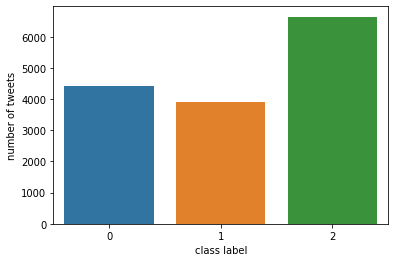

In [10]:
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

#   Limpando o texto

1. Removendo os @users do Twitter
2. Removendo as urls do texto 
3. Removendo pontuações, números e caracteres espaciais

5. Converter o texto em minusculo
6. Rovendo as Stopwords
7. Realizando Stemming nas palavras
8. Realizando Lemmatization nas palavras

In [11]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [12]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [14]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [15]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
tweets_df['length_tweet']=tweets_df['text_clean'].str.len()
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,sentiment,text,text_clean,length_tweet
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65


# Lemmatization

In [16]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 10.8 MB/s 
     |████████████████████████████████| 1.2 MB 33.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.0
    Uninstalling spacy-3.4.0:
      Successfully uninstalled spacy-3.4.0
2022-07-27 21:48:21.306745: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [17]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [18]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [19]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]

In [20]:
tweets_df.head()

,sentiment,text,text_clean,length_tweet,text_lemma
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19,irmã galvão ador
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [21]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 9.8 MB/s eta 0:00:00


In [22]:
import simplemma
from simplemma import text_lemmatizer

In [23]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [24]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente

In [25]:
tweets_df.head()

,sentiment,text,text_clean,length_tweet,text_lemma,text_lemma_2
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19,irmã galvão ador,irmão galvão adorar
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


# Processo de vetorização

###Word2vec
__size:__ The number of dimensions of the embeddings and the default is 100.

__window:__ The maximum distance between a target word and words around the target word. The default window is 5.

__min_count:__ The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

__workers:__ The number of partitions during training and the default workers is 3.

__sg:__ The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [26]:
import gensim

tokenize = tweets_df['text_lemma_2'].apply(lambda x: x.split()) #tokenização
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, size = 100, window = 5, sg = 1) #carregamento do modelo work2vec
w2vec_model.train(tokenize, total_examples = len(tweets_df['text_lemma_2']), epochs=20) #treinamento do modelo work2vec

(1782701, 1943360)

In [27]:
w2vec_model.most_similar('carro')

[('viajar', 0.7912878394126892),
 ('trair', 0.7652583122253418),
 ('emprestar', 0.7609559297561646),
 ('largar', 0.7529971599578857),
 ('namorado', 0.7451573610305786),
 ('tras', 0.7409486770629883),
 ('combi', 0.7405029535293579),
 ('adotivo', 0.7384653091430664),
 ('américa', 0.7357430458068848),
 ('goies', 0.7330565452575684)]

In [28]:
# preparando para vetorização
w2v_words = list(w2vec_model.wv.vocab)
print("number of words that occured minimum 5 times ", len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  10960
sample words  ['coisar', 'lindar', 'programar', 'mostrar', 'familia', 'adotar', 'adolescente', 'ano', 'amor', 'irmão', 'galvão', 'adorar', 'mr', 'catra', 'lançar', 'novo', 'músico', 'ppk', 'chorar', 'k', 'mrcatra', 'ppkchora', 'ver', 'lutador', 'modelar', 'barbudo', 'tatuado', 'masterchefbr', 'tô', 'passado', 'caro', 'quanto', 'merda', 'poder', 'sair', 'bocar', 'alguém', 'algum', 'minuto', 'cibele', 'arrasar', 'humilhar', 'mina', 'sacolé', 'chup', 'videoshowaovivo', 'prato', 'masterchef', 'sardinha', 'enlatado']


In [29]:
# Vetorizador (transforma o conjunto de palavras em um conjunto numérico)

vector = []
from tqdm import tqdm
for sent in tqdm(tokenize):
  sent_vec = np.zeros(100)
  count = 0
  for word in sent: 
    if word in w2v_words:
      vec = w2vec_model.wv[word]
      sent_vec += vec 
      count += 1
  if count != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)
print(len(vector))
print(len(vector[0])) 

100%|██████████| 15000/15000 [00:11<00:00, 1265.92it/s]

15000
100


In [30]:
#example
l='coisa linda programa mostrando familia adotou adolescente anos amor'
count = 0
vcc = np.zeros(100)
for word in l:
  if word in w2v_words:
    v = w2vec_model.wv[word]
    vcc += v
    count += 1
vcc

array([ -0.87882159,   7.77068245,   5.9593655 ,  -6.71738477,
         7.23240328,  -8.01041905,  12.47008476,  -3.5758536 ,
        10.32966375,  11.93529282,  23.19434766, -11.94625833,
       -15.77997299,  -2.06924586,   6.82026592,  -7.1646335 ,
         0.35099886, -11.28811902, -34.26927647,   7.63789774,
        14.61457587, -10.06597834,  -5.95685113,  11.60829179,
        15.26527322,  -7.43787234, -12.75236167,  12.22125571,
       -14.26694976,   9.27695692,  -7.70916658,  -3.82954199,
         3.75515293, -13.4094355 ,   1.93498986,  -5.36654265,
         4.15736134,  -5.79020455,  11.46739992,   7.74013865,
       -18.79035191,  19.89630836, -11.18312744,  -6.61525572,
         0.66396565,   7.75408452,  20.51857964,  18.2345512 ,
        -0.06094269,   7.10401128,  -5.13574313,   7.01535514,
       -20.30380979,   5.1479376 ,  -6.23938889,   0.67767466,
         8.7332524 ,   3.82199832,  26.07777667, -25.7214036 ,
         7.28531031,  -9.94079904,   2.73071332,  -3.46

In [31]:
print('number of uniqe words', len(vector[1]))
w2v_train = pd.DataFrame(vector)
w2v_train['length_tweet'] = tweets_df['length_tweet']
w2v_train['sentiment'] = tweets_df['sentiment']
w2v_train.head()

number of uniqe words 100


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,length_tweet,sentiment
0,0.081069,0.178900,0.171231,0.188452,0.083979,-0.389049,0.314434,-0.325252,0.011820,0.303033,...,-0.239142,-0.627687,-0.212353,-0.247555,0.448386,0.420362,-0.160851,0.485489,67,2
1,-0.068662,-0.052061,-0.039100,-0.091266,0.657285,-0.472602,0.118035,-0.436885,0.610920,-0.039913,...,-0.164335,0.049580,-0.455461,-0.322258,0.568782,0.358667,-0.234043,0.263387,19,2
2,0.426421,-0.254012,0.082951,0.078951,0.229469,-0.113552,0.319750,-0.070233,0.465382,0.101903,...,-0.086778,-0.026668,-0.147352,-0.174090,0.802848,0.174974,-0.121783,0.032853,62,2
3,-0.035225,-0.024403,0.011973,0.102659,-0.160863,-0.176517,0.367470,0.098555,0.290753,-0.121305,...,-0.018074,-0.264023,-0.022087,-0.050962,0.178864,0.261355,-0.100397,0.304573,48,1
4,0.167378,-0.100074,0.089658,-0.074582,0.008350,-0.395448,0.481660,-0.225169,0.343137,-0.190966,...,-0.217276,-0.411389,-0.041548,-0.005479,0.471302,0.243424,0.101015,0.347089,65,0


# Separando dados para o treino e para o teste

In [32]:
from sklearn.model_selection import train_test_split

X = w2v_train.iloc[:, 0:-1]
y = w2v_train['sentiment']

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X, y, test_size=0.2)
X_train_w2v.shape, y_train_w2v.shape, X_test_w2v.shape, y_test_w2v.shape

((12000, 101), (12000,), (3000, 101), (3000,))

# Machine Learning - Utils

In [33]:
# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [34]:
# função para escolher os modelos a serem treinados
def escolher_modelo(model):
    
    if(model == 1):
        modelo_sgd_w2v = SGDClassifier()
        return modelo_sgd_w2v
    
    elif(model == 2):
        modelo_nb_w2v = MultinomialNB()
        return modelo_nb_w2v
    
    elif(model == 3):
        modelo_rf_w2v = RandomForestClassifier(n_estimators=10)
        return modelo_rf_w2v
    
    elif(model == 4):
        modelo_knn_w2v = KNeighborsClassifier()
        return modelo_knn_w2v
    
    elif(model == 5):
        modelo_pa_w2v = PassiveAggressiveClassifier()
        return modelo_pa_w2v
    
    elif(model == 6):
        modelo_gb_w2v = GradientBoostingClassifier()
        return modelo_gb_w2v
    
    elif(model == 7):
        modelo_xgb_w2v = xgb.XGBClassifier()
        return modelo_xgb_w2v
    
    elif(model == 8):
        modelo_mlp_w2v = MLPClassifier()
        return modelo_mlp_w2v
    
    elif(model == 9):
        modelo_lr_w2v = LogisticRegression()
        return modelo_lr_w2v
    
    elif(model == 10):
        modelo_svc_w2v = SVC()
        return modelo_svc_w2v

In [35]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

## Modelo 1 (Word2vec e SGD)

In [37]:
modelo1_orig = escolher_modelo(1)
modelo1_orig = modelo1_orig.fit(X_train_w2v, y_train_w2v)
modelo1_pred_orig = modelo1_orig.predict(X_test_w2v)

modelo1_pred_orig

array([2, 1, 2, ..., 2, 1, 2])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.27      0.38       898
           1       0.57      0.21      0.31       811
           2       0.50      0.91      0.65      1291

    accuracy                           0.53      3000
   macro avg       0.58      0.46      0.45      3000
weighted avg       0.57      0.53      0.48      3000

Acurácia: 0.5290

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        239   65   594   898
1         68  170   573   811
2         48   65  1178  1291
All      355  300  2345  3000 


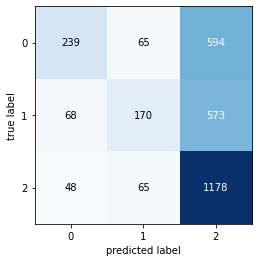

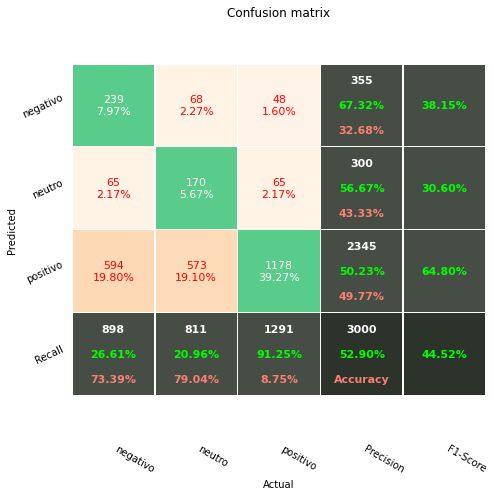

In [38]:
matriz_confusao(y_test_w2v, modelo1_pred_orig)

### Validação cruzada - modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.31      0.40      4426
           1       0.35      0.62      0.45      3926
           2       0.69      0.58      0.63      6648

    accuracy                           0.51     15000
   macro avg       0.54      0.51      0.49     15000
weighted avg       0.57      0.51      0.52     15000

Acurácia: 0.5128

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        1369  2235   822   4426
1         559  2444   923   3926
2         480  2289  3879   6648
All      2408  6968  5624  15000 


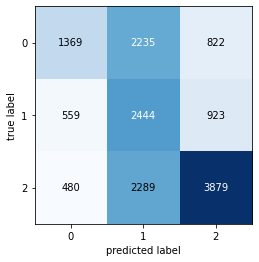

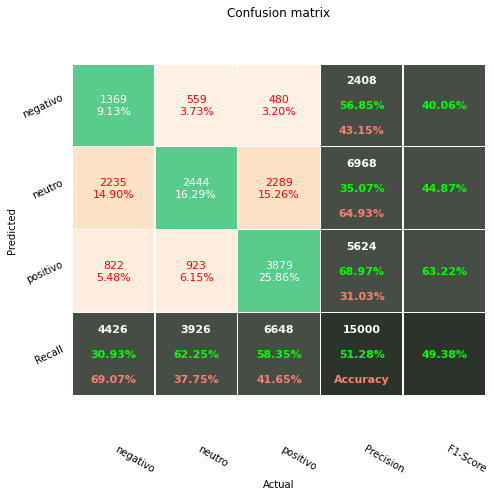

In [39]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (Word2vec e MultinomialNB)

In [40]:
# não funciona

'''
modelo2_orig = escolher_modelo(2)
modelo2_orig = modelo2_orig.fit(X_train_w2v, y_train_w2v)
modelo2_pred_orig = modelo2_orig.predict(X_test_w2v)

modelo2_pred_orig
'''

'\nmodelo2_orig = escolher_modelo(2)\nmodelo2_orig = modelo2_orig.fit(X_train_w2v, y_train_w2v)\nmodelo2_pred_orig = modelo2_orig.predict(X_test_w2v)\n\nmodelo2_pred_orig\n'

### Avaliando o modelo 2

In [41]:
#matriz_confusao(y_test_w2v, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [42]:
'''
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada2)
'''

'\nvalidacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)\nmatriz_confusao(y, validacao_cruzada2)\n'

## Modelo 3 (Word2vec e RandomForest)

In [43]:
modelo3_orig = escolher_modelo(3)
modelo3_orig = modelo3_orig.fit(X_train_w2v, y_train_w2v)
modelo3_pred_orig = modelo3_orig.predict(X_test_w2v)

modelo3_pred_orig

array([2, 0, 0, ..., 2, 0, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.51      0.54      0.52       898
           1       0.44      0.31      0.37       811
           2       0.60      0.68      0.64      1291

    accuracy                           0.54      3000
   macro avg       0.52      0.51      0.51      3000
weighted avg       0.53      0.54      0.53      3000

Acurácia: 0.5393

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        486  144   268   898
1        237  254   320   811
2        239  174   878  1291
All      962  572  1466  3000 


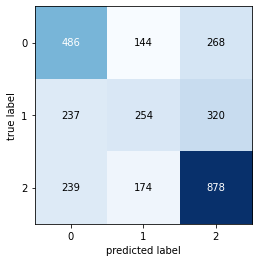

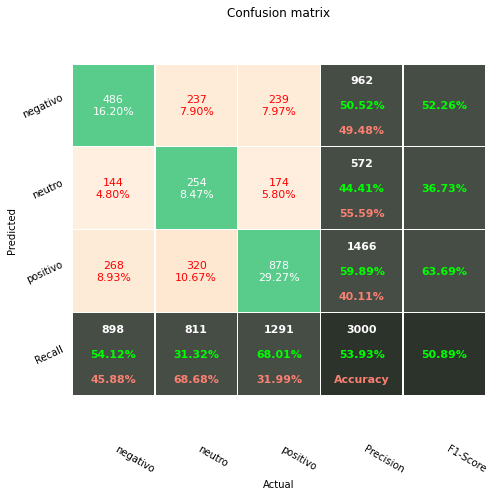

In [44]:
matriz_confusao(y_test_w2v, modelo3_pred_orig)

### Validação cruzada - modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52      4426
           1       0.42      0.33      0.37      3926
           2       0.63      0.68      0.65      6648

    accuracy                           0.55     15000
   macro avg       0.52      0.52      0.51     15000
weighted avg       0.54      0.55      0.54     15000

Acurácia: 0.5454

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2395   837  1194   4426
1        1212  1288  1426   3926
2        1185   965  4498   6648
All      4792  3090  7118  15000 


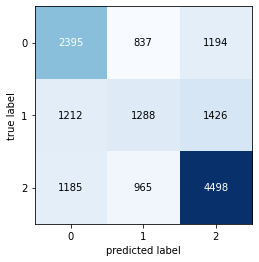

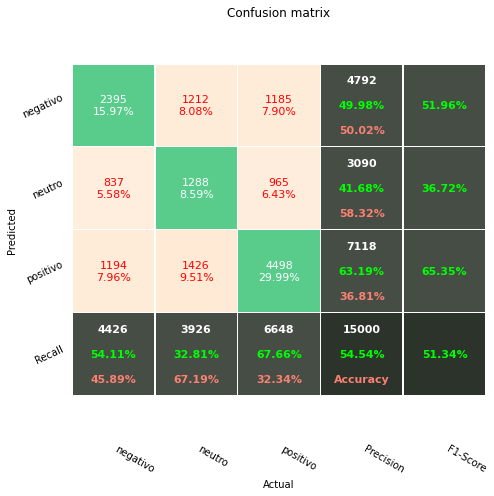

In [45]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (Word2vec e KNeighbors)

In [46]:
modelo4_orig = escolher_modelo(4)
modelo4_orig = modelo4_orig.fit(X_train_w2v, y_train_w2v)
modelo4_pred_orig = modelo4_orig.predict(X_test_w2v)

modelo4_pred_orig

array([2, 0, 2, ..., 0, 1, 0])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.44      0.60      0.51       898
           1       0.40      0.34      0.37       811
           2       0.62      0.51      0.56      1291

    accuracy                           0.49      3000
   macro avg       0.48      0.48      0.48      3000
weighted avg       0.50      0.49      0.49      3000

Acurácia: 0.4923

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         540  169   189   898
1         312  275   224   811
2         383  246   662  1291
All      1235  690  1075  3000 


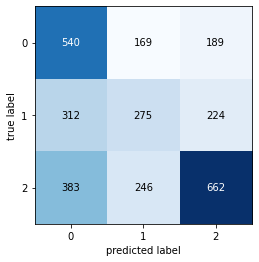

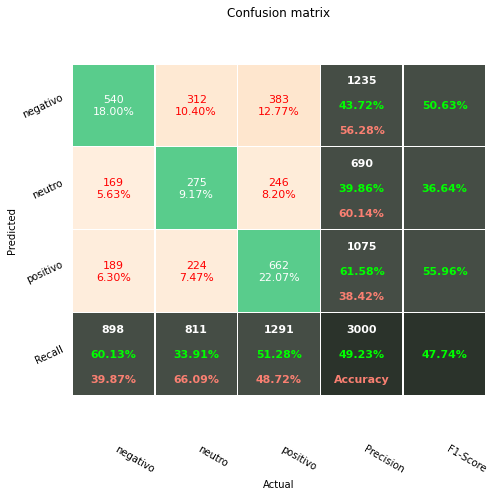

In [47]:
matriz_confusao(y_test_w2v, modelo4_pred_orig)

### Validação cruzada - modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.42      0.58      0.49      4426
           1       0.37      0.34      0.35      3926
           2       0.63      0.51      0.56      6648

    accuracy                           0.48     15000
   macro avg       0.47      0.48      0.47     15000
weighted avg       0.50      0.48      0.49     15000

Acurácia: 0.4849

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2562   937   927   4426
1        1512  1329  1085   3926
2        1962  1304  3382   6648
All      6036  3570  5394  15000 


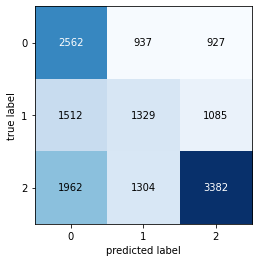

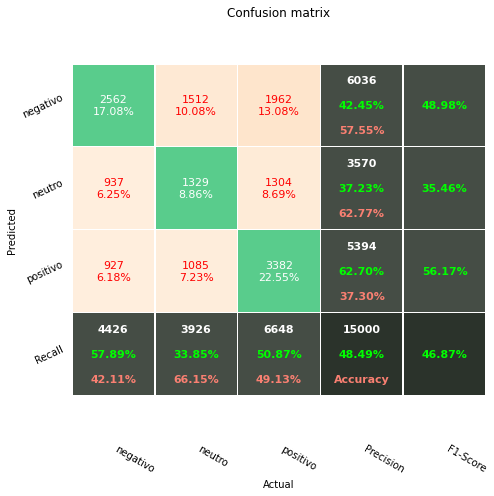

In [48]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (Word2vec e PassiveAggressive)

In [49]:
modelo5_orig = escolher_modelo(5)
modelo5_orig = modelo5_orig.fit(X_train_w2v, y_train_w2v)
modelo5_pred_orig = modelo5_orig.predict(X_test_w2v)

modelo5_pred_orig

array([1, 1, 2, ..., 1, 1, 2])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.06      0.11       898
           1       0.33      0.81      0.47       811
           2       0.71      0.53      0.60      1291

    accuracy                           0.47      3000
   macro avg       0.65      0.47      0.40      3000
weighted avg       0.66      0.47      0.42      3000

Acurácia: 0.4657

Matrix de confusão:
 Predito   0     1    2   All
Real                        
0        55   707  136   898
1         4   660  147   811
2         2   607  682  1291
All      61  1974  965  3000 


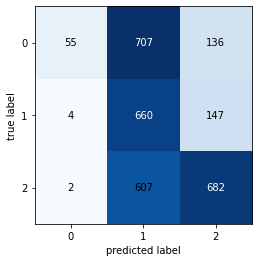

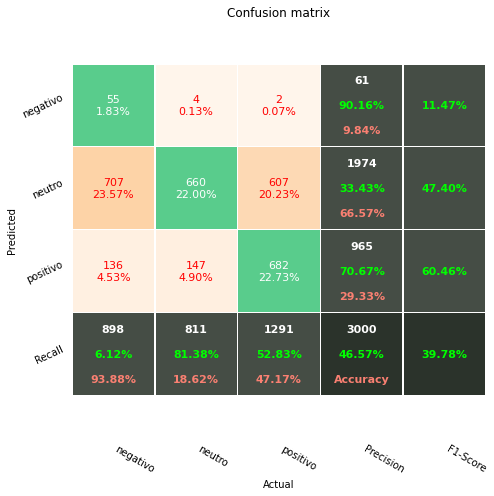

In [50]:
matriz_confusao(y_test_w2v, modelo5_pred_orig)

### Validação cruzada - modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.40      0.65      0.50      4426
           1       0.41      0.23      0.30      3926
           2       0.60      0.51      0.55      6648

    accuracy                           0.48     15000
   macro avg       0.47      0.46      0.45     15000
weighted avg       0.49      0.48      0.47     15000

Acurácia: 0.4775

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2868   484  1074   4426
1        1786   918  1222   3926
2        2451   821  3376   6648
All      7105  2223  5672  15000 


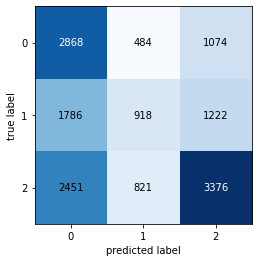

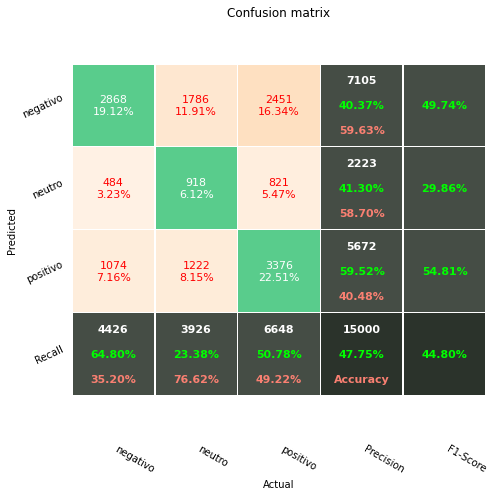

In [51]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (Word2vec e GradientBoosting)

In [52]:
modelo6_orig = escolher_modelo(6)
modelo6_orig = modelo6_orig.fit(X_train_w2v, y_train_w2v)
modelo6_pred_orig = modelo6_orig.predict(X_test_w2v)

modelo6_pred_orig

array([2, 0, 0, ..., 1, 0, 2])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.60      0.58       898
           1       0.53      0.31      0.40       811
           2       0.63      0.77      0.69      1291

    accuracy                           0.60      3000
   macro avg       0.58      0.56      0.56      3000
weighted avg       0.59      0.60      0.58      3000

Acurácia: 0.5953

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        535  111   252   898
1        227  255   329   811
2        184  111   996  1291
All      946  477  1577  3000 


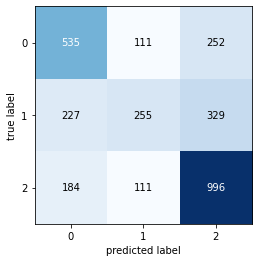

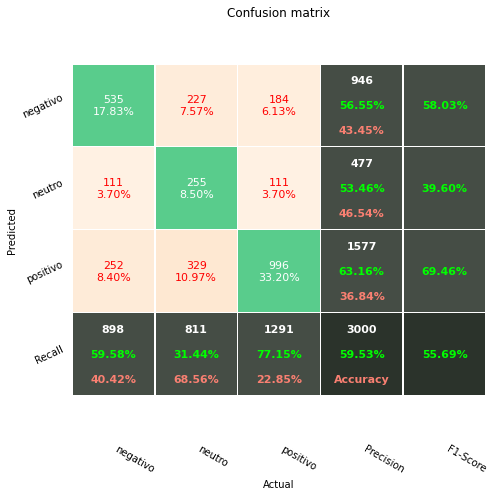

In [53]:
matriz_confusao(y_test_w2v, modelo6_pred_orig)

### Validação cruzada - modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59      4426
           1       0.53      0.34      0.41      3926
           2       0.65      0.77      0.70      6648

    accuracy                           0.61     15000
   macro avg       0.59      0.57      0.57     15000
weighted avg       0.60      0.61      0.59     15000

Acurácia: 0.6069

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2671   542  1213   4426
1        1076  1326  1524   3926
2         917   624  5107   6648
All      4664  2492  7844  15000 


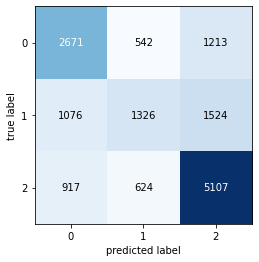

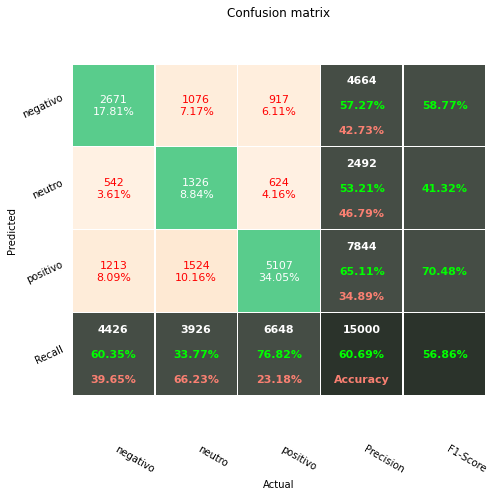

In [54]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (Word2vec e XGB)

In [55]:
modelo7_orig = escolher_modelo(7)
modelo7_orig = modelo7_orig.fit(X_train_w2v, y_train_w2v)
modelo7_pred_orig = modelo7_orig.predict(X_test_w2v)

modelo7_pred_orig

array([2, 0, 2, ..., 2, 2, 2])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       898
           1       0.54      0.28      0.37       811
           2       0.62      0.78      0.69      1291

    accuracy                           0.59      3000
   macro avg       0.58      0.55      0.55      3000
weighted avg       0.58      0.59      0.57      3000

Acurácia: 0.5923

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        537   97   264   898
1        233  228   350   811
2        184   95  1012  1291
All      954  420  1626  3000 


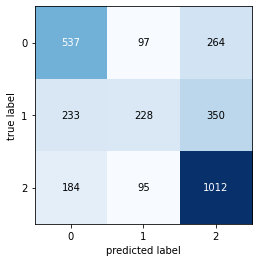

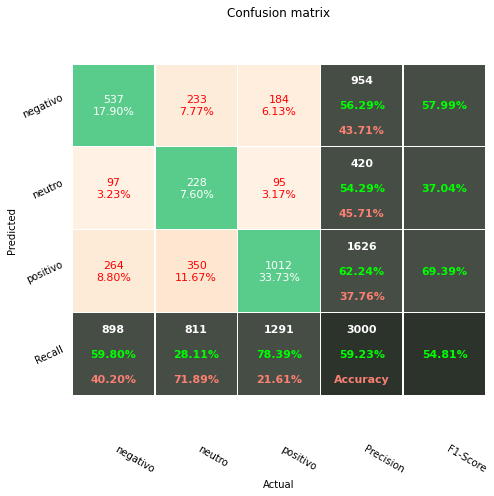

In [56]:
matriz_confusao(y_test_w2v, modelo7_pred_orig)

### Validação cruzada - modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58      4426
           1       0.53      0.31      0.39      3926
           2       0.64      0.77      0.70      6648

    accuracy                           0.60     15000
   macro avg       0.58      0.56      0.56     15000
weighted avg       0.59      0.60      0.58     15000

Acurácia: 0.5995

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2660   517  1249   4426
1        1140  1222  1564   3926
2         976   562  5110   6648
All      4776  2301  7923  15000 


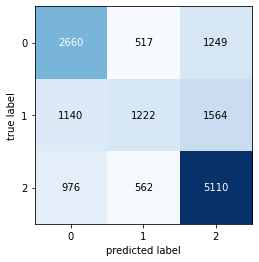

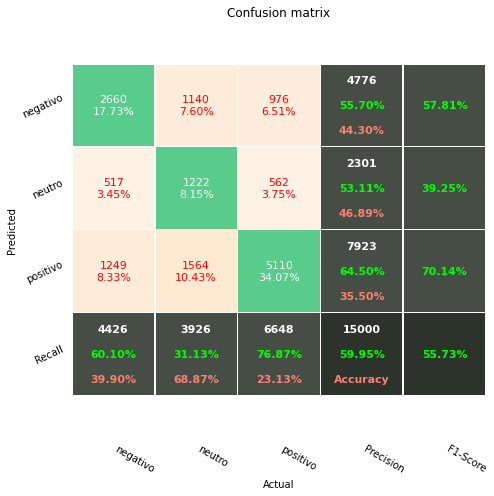

In [57]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (Word2vec e MLP)

In [58]:
modelo8_orig = escolher_modelo(8)
modelo8_orig = modelo8_orig.fit(X_train_w2v, y_train_w2v)
modelo8_pred_orig = modelo8_orig.predict(X_test_w2v)

modelo8_pred_orig

array([2, 0, 2, ..., 0, 0, 2])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58       898
           1       0.49      0.48      0.48       811
           2       0.67      0.72      0.70      1291

    accuracy                           0.61      3000
   macro avg       0.59      0.58      0.59      3000
weighted avg       0.60      0.61      0.60      3000

Acurácia: 0.6057

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        493  203   202   898
1        167  390   254   811
2        146  211   934  1291
All      806  804  1390  3000 


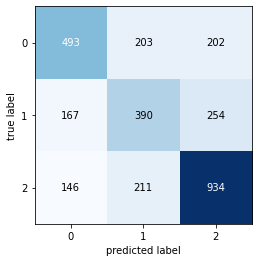

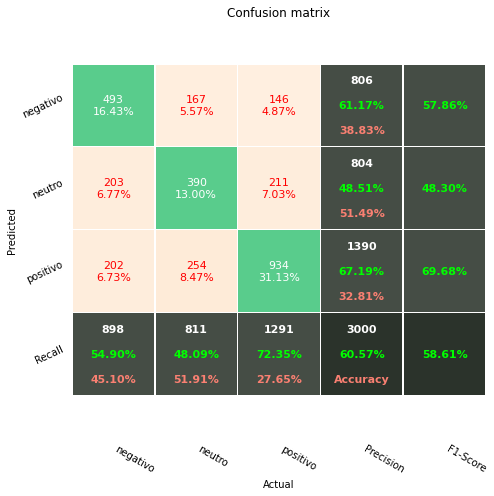

In [59]:
matriz_confusao(y_test_w2v, modelo8_pred_orig)

### Validação cruzada - modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59      4426
           1       0.46      0.41      0.44      3926
           2       0.69      0.70      0.69      6648

    accuracy                           0.60     15000
   macro avg       0.57      0.57      0.57     15000
weighted avg       0.59      0.60      0.59     15000

Acurácia: 0.5977

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2678   850   898   4426
1        1080  1615  1231   3926
2         951  1024  4673   6648
All      4709  3489  6802  15000 


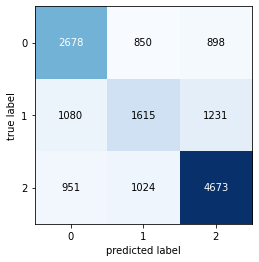

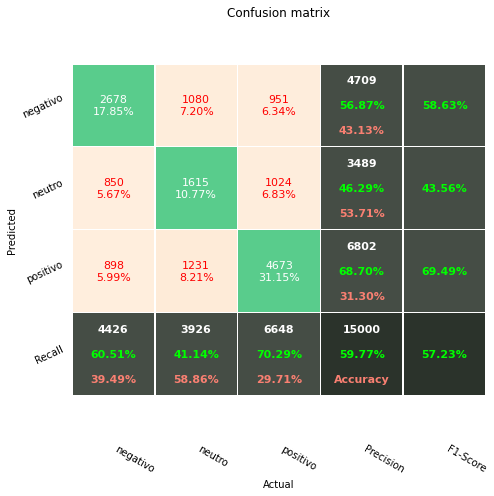

In [60]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (Word2vec e LogisticRegression)

In [61]:
modelo9_orig = escolher_modelo(9)
modelo9_orig = modelo9_orig.fit(X_train_w2v, y_train_w2v)
modelo9_pred_orig = modelo9_orig.predict(X_test_w2v)

modelo9_pred_orig

array([2, 0, 2, ..., 0, 0, 2])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59       898
           1       0.50      0.33      0.40       811
           2       0.63      0.77      0.69      1291

    accuracy                           0.60      3000
   macro avg       0.58      0.56      0.56      3000
weighted avg       0.59      0.60      0.58      3000

Acurácia: 0.5970

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        533  123   242   898
1        204  270   337   811
2        159  144   988  1291
All      896  537  1567  3000 


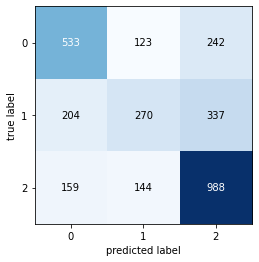

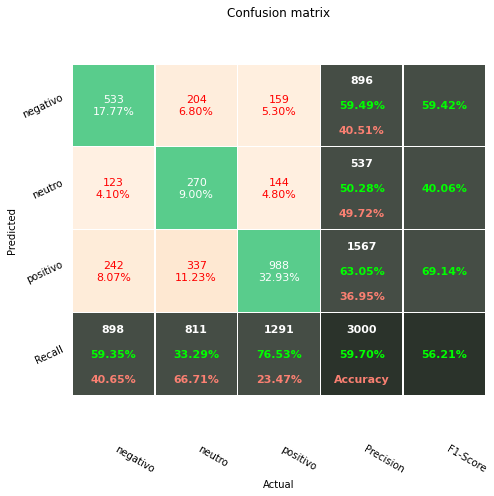

In [62]:
matriz_confusao(y_test_w2v, modelo9_pred_orig)

### Validação cruzada - modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59      4426
           1       0.51      0.36      0.42      3926
           2       0.66      0.75      0.70      6648

    accuracy                           0.60     15000
   macro avg       0.58      0.57      0.57     15000
weighted avg       0.59      0.60      0.59     15000

Acurácia: 0.6046

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2673   596  1157   4426
1        1071  1409  1446   3926
2         929   732  4987   6648
All      4673  2737  7590  15000 


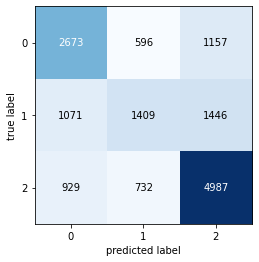

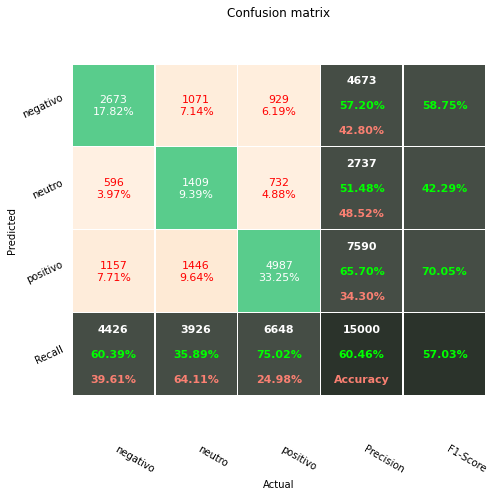

In [63]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (Word2vec e SVC)

In [64]:
modelo10_orig = escolher_modelo(10)
modelo10_orig = modelo10_orig.fit(X_train_w2v, y_train_w2v)
modelo10_pred_orig = modelo10_orig.predict(X_test_w2v)

modelo10_pred_orig

array([0, 2, 2, ..., 0, 2, 2])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.47      0.20      0.28       898
           1       0.00      0.00      0.00       811
           2       0.45      0.92      0.61      1291

    accuracy                           0.46      3000
   macro avg       0.31      0.37      0.30      3000
weighted avg       0.34      0.46      0.35      3000

Acurácia: 0.4557

Matrix de confusão:
 Predito    0     2   All
Real                    
0        183   715   898
1         97   714   811
2        107  1184  1291
All      387  2613  3000 


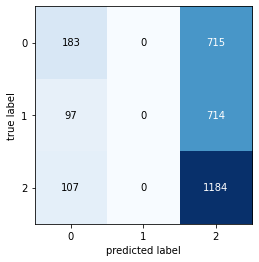

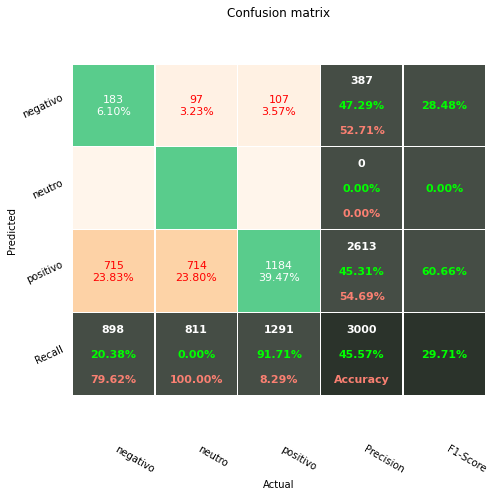

In [65]:
matriz_confusao(y_test_w2v, modelo10_pred_orig)

### Validação cruzada - modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.52      0.26      0.35      4426
           1       0.00      0.00      0.00      3926
           2       0.48      0.91      0.63      6648

    accuracy                           0.48     15000
   macro avg       0.33      0.39      0.33     15000
weighted avg       0.36      0.48      0.38     15000

Acurácia: 0.4825

Matrix de confusão:
 Predito     0      2    All
Real                       
0        1166   3260   4426
1         519   3407   3926
2         576   6072   6648
All      2261  12739  15000 


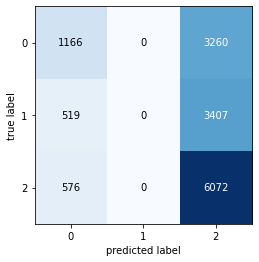

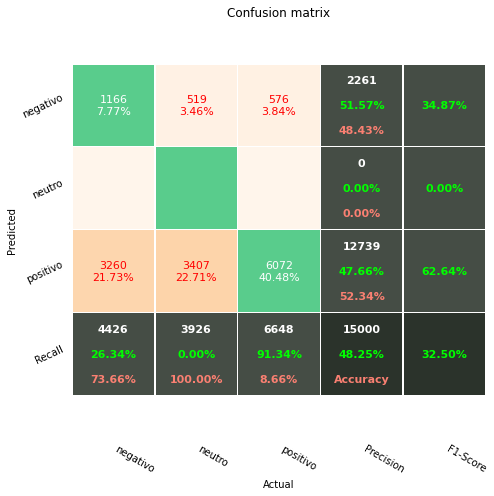

In [66]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [67]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test_w2v, modelo1_pred_orig, output_dict=True)
# report2 = metrics.classification_report(y_test_w2v, modelo2_pred_orig, output_dict=True) não funciona
report3 = metrics.classification_report(y_test_w2v, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test_w2v, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test_w2v, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test_w2v, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test_w2v, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test_w2v, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test_w2v, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test_w2v, modelo10_pred_orig, output_dict=True)

In [68]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'f1_media', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [69]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy


In [70]:
# MultinomialNB não funciona

# criando a lista com o modelos de classificação
modelos = ['SGD_word2vec',
            'RandomForest_word2vec',
            'KNeighbors_word2vec',
            'PassiveAggressive_word2vec',
            'GradientBoosting_word2vec',
            'XGB_word2vec',
            'MLP_word2vec',
            'LogisticRegression_word2vec',
            'SVC_word2vec']

In [71]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [72]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['weighted avg']['f1-score'],2),
                    round(reports[i]['accuracy'], 2)] 

In [73]:
report_df.sort_values(by='f1_media', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy
6,MLP_word2vec,0.61,0.49,0.67,0.55,0.48,0.72,0.58,0.48,0.70,0.60,0.61
4,GradientBoosting_word2vec,0.57,0.53,0.63,0.60,0.31,0.77,0.58,0.40,0.69,0.58,0.60
7,LogisticRegression_word2vec,0.59,0.50,0.63,0.59,0.33,0.77,0.59,0.40,0.69,0.58,0.60
5,XGB_word2vec,0.56,0.54,0.62,0.60,0.28,0.78,0.58,0.37,0.69,0.57,0.59
1,RandomForest_word2vec,0.51,0.44,0.60,0.54,0.31,0.68,0.52,0.37,0.64,0.53,0.54
2,KNeighbors_word2vec,0.44,0.40,0.62,0.60,0.34,0.51,0.51,0.37,0.56,0.49,0.49
0,SGD_word2vec,0.67,0.57,0.50,0.27,0.21,0.91,0.38,0.31,0.65,0.48,0.53
3,PassiveAggressive_word2vec,0.90,0.33,0.71,0.06,0.81,0.53,0.11,0.47,0.60,0.42,0.47
8,SVC_word2vec,0.47,0.00,0.45,0.20,0.00,0.92,0.28,0.00,0.61,0.35,0.46
